<a href="https://colab.research.google.com/github/Gonzalez-Matias/Heart_Disease/blob/main/Analisis_Multivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
heart_data = pd.read_csv("heart-disease/heart_2020_cleaned.csv")

In [ ]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Analisis Multivariado

### BMI vs DiffWalking vs HeartDisease
Se buscará una posible relación entre índice de masa corporal de una persona con el hecho de si esta tiene dificultad para caminar y ver como se comporta la probabilidad de tener problemas cardiacos

In [ ]:
heart_data["quintil_grosor"] = 1
heart_data["quintil_grosor"] = heart_data.BMI.apply(lambda x: 1 if x<=23.29 else (2 if (x>23.29) & (x<=25.83) else (3 if (x>25.83) & (x<=28.69) else (4 if (x>28.69) & (x<=32.55) else 5))))  

In [ ]:
df_quintil_grosor = heart_data.groupby(["quintil_grosor"], dropna=False)["BMI"].min().to_frame(name='min').join(heart_data.groupby(["quintil_grosor"], dropna=False)["BMI"].max().to_frame(name='max')).join(heart_data.groupby(["quintil_grosor"], dropna=False)["BMI"].count().to_frame(name='nro_casos'))

In [ ]:
ct = pd.crosstab(heart_data.HeartDisease,heart_data.quintil_grosor, margins=True).T*100
ct["No"] = ct["No"]/ct["All"]*100
ct["Yes"] = ct["Yes"]/ct["All"]*100
ct["All"] = ct["All"]/ct["All"]*100
ct.drop("All", inplace = True)

In [ ]:
data_walk_x_hd = pd.crosstab(heart_data.quintil_grosor, heart_data.DiffWalking, margins=True).drop("All")
data_walk_x_hd["Yes"] = data_walk_x_hd["Yes"]/len(heart_data)*100
data_walk_x_hd["No"] = data_walk_x_hd["No"]/len(heart_data)*100
data_walk_x_hd = data_walk_x_hd[["Yes","No"]]

In [ ]:
df_quintil_grosor = df_quintil_grosor.join(data_walk_x_hd)

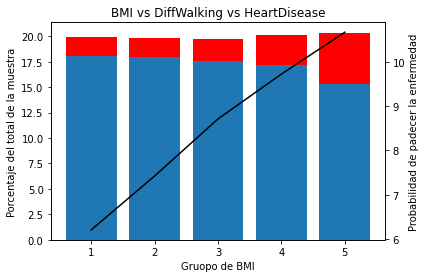

In [ ]:
plt.bar(x= df_quintil_grosor.index , height=df_quintil_grosor['No'])
plt.xlabel("Gruopo de BMI")
plt.ylabel("Porcentaje del total de la muestra")
plt.bar(x= df_quintil_grosor.index, height=df_quintil_grosor['Yes'], bottom=df_quintil_grosor['No'], color='r')
ax2 = plt.twinx()
ax2.plot(ct.index, ct['Yes'], color="black")
plt.ylabel("Probabilidad de padecer la enfermedad")
plt.title("BMI vs DiffWalking vs HeartDisease")

plt.show()

#### CONCLUCIONES
* En rojo tenemos la cantidad de personas con dificultad para caminar y en azul las que no
* Como se puede observar en el gráfico anterior a medida que el BMI aumenta tambien lo hace la dificultad para caminar  
* Ambas situaciones es tan muy relacionadas con el aumento del riesgo de padecer una enfermedad cardiaca  

In [ ]:
df = heart_data['HeartDisease']
df = pd.DataFrame(df)
df.replace({"Yes":"Enfermo","No":"No enfermo"}, inplace=True)
df['Smoking'] = heart_data['Smoking']
df.replace({"Yes":"Fuma","No":"No fuma"}, inplace=True)
df['AlcoholDrinking'] = heart_data['AlcoholDrinking']
df.replace({"Yes":"Bebe","No":"No bebe"}, inplace=True)
fig = px.sunburst(df, path=['Smoking', 'AlcoholDrinking', 'HeartDisease'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

#### CONCLUCIONES
* Como se observa en el grafico superior las personas que fuman son mas propensas a consumir mas alcohol
* Si bien el fumar si es un factor que aumenta la probabilidad de tener una enfermedad cardiaca esta probabilidad pareciera disminuir si la persona bebe

In [ ]:
df = heart_data['HeartDisease']
df = pd.DataFrame(df)
df.replace({"Yes":"Enfermo","No":"No enfermo"}, inplace=True)
df['Sex'] = heart_data['Sex']
df['PhysicalActivity'] = heart_data['PhysicalActivity']
df.replace({"Yes":"Hace act. fisica","No":"No hace act. fisica"}, inplace=True)
fig = px.sunburst(df, path=['Sex', 'PhysicalActivity', 'HeartDisease'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

#### CONCLUCIONES
* Como se observa en el grafico superior los hombres tienden a tener mas problemas del corazón
* Los hombres tienden a hacer actividad física mas que las mujeres, sin embargo es en ellas que el hecho de hacer ejercicio es mas beneficioso para disminuir las probabilidades de tener problemas del corazón

In [99]:
df_quintil_grosor = heart_data.groupby(["SleepTime"], dropna=False)["SleepTime"].min().to_frame(name='min').join(heart_data.groupby(["SleepTime"], dropna=False)["SleepTime"].max().to_frame(name='max')).join(heart_data.groupby(["SleepTime"], dropna=False)["SleepTime"].count().to_frame(name='nro_casos'))

In [100]:
ct = pd.crosstab(heart_data.HeartDisease,heart_data.SleepTime, margins=True).T*100
ct["No"] = ct["No"]/ct["All"]*100
ct["Yes"] = ct["Yes"]/ct["All"]*100
ct["All"] = ct["All"]/ct["All"]*100
ct.drop("All", inplace = True)

In [101]:
df_quintil_grosor = df_quintil_grosor.join(ct["Yes"]).join(heart_data.groupby(["SleepTime"], dropna=False)["MentalHealth"].mean())
df_quintil_grosor = df_quintil_grosor.join(heart_data.groupby(["SleepTime"], dropna=False)["PhysicalHealth"].mean())[["nro_casos","Yes","MentalHealth","PhysicalHealth"]]

In [104]:
df_quintil_grosor = df_quintil_grosor[2:15]

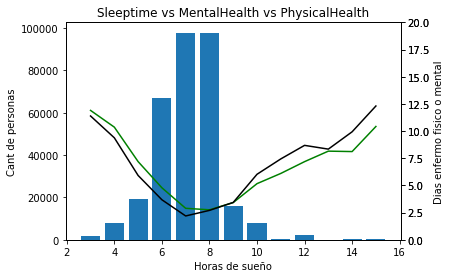

In [106]:
fig, ax1 = plt.subplots()  
ax1.bar(x= df_quintil_grosor.index , height=df_quintil_grosor['nro_casos'])
plt.xlabel("Horas de sueño")
plt.ylabel("Cant de personas")
ax3 = ax1.twinx()
ax3.plot(df_quintil_grosor.index, df_quintil_grosor['MentalHealth'], color="green")
plt.ylim(0, 20)
ax4 = ax1.twinx()
ax4.plot(df_quintil_grosor.index, df_quintil_grosor['PhysicalHealth'], color="black")
plt.ylim(0, 20)
plt.ylabel("Dias enfermo fisico o mental")
plt.title("Sleeptime vs MentalHealth vs PhysicalHealth")
plt.show()

#### CONCLUCIONES
* Podemos observar la distribución de las horas de sueño de las personas, la línea verde representa la salud mental promedio de una persona que duerme la cantidad de hora correspondiente a la posicion x y la línea negra es lo mismo pero para la salud física, en ambos casos a mayor valor peor es la salud de la persona
* Podemos concluir que las personas que salen de la cantidad de horas de sueño promedio ven afectada seriamente su salud tanto físca como mental